<a href="https://colab.research.google.com/github/caiociardelli/earth323/blob/main/Normal_Modes_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normal modes of a string

Author: Caio Ciardelli
<br>
Northwestern University, October 6, 2022
<br>

###Displacement as summation over all modes

\begin{equation}
u(x,\,t)
\,=\,\sum_{0}^{\infty}A_{n}U_{n}(x,\,\omega_{n})\cos(\omega_{n} t),
\end{equation}
<br>
Being:
<br>
\begin{equation}
A_{n}
\,=\,\sin\left(\frac{n\pi x_s}{L}\right)F(\omega_n),
\quad\text{where}
\quad F(\omega_n)
\,=\,e^{-\frac{(\omega_{n}\tau)^2}{4}},
\end{equation}
<br>
\begin{equation}
U_{n}(x,\,\omega_{n})
\,=\,\sin\left(\frac{\omega_{n}x}{\nu}\right)
\,=\,\sin\left(\frac{n\pi x}{L}\right),
\end{equation}
and
\begin{equation}
\omega_{n}
\,=\,\frac{n\pi\nu}{L}
\,=\,\frac{2\pi\nu}{\lambda}
\quad\text{or}\quad
L\,=\,\frac{n\lambda}{2}
\end{equation}
<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fw (nu, tau, L, N):

  w = np.empty (N)
  F = np.empty (N)

  for n in range (N):

    w[n] = n * np.pi * nu / L
    F[n] = np.exp (-0.25 * (w[n] * tau) ** 2)

  return w, F

def u_x (N, nx, c, xs, L, w, F, tr):

  x = np.linspace (0, L, nx)
  u = np.zeros (nx)

  for n in range (N):

    An = np.sin (n * np.pi * xs / L) * F[n]
    Un = np.sin (n * np.pi * x / L)

    u += An * Un * np.cos (w[n] * tr)

  return x, u

def u_t (N, nt, c, xs, xr, L, w, F, T):

  t = np.linspace (0, T, nt)
  u = np.zeros (nt)

  for n in range (N):

    An = np.sin (n * np.pi * xs / L) * F[n]
    Un = np.sin (n * np.pi * xr / L)

    u += An * Un * np.cos (w[n] * t)

  return t, u

In [ ]:
if __name__ == '__main__':

# Modify the parameters and re-execute the code to see how the
# travel-time curves change (tip: try v2 = v3 and v2 < v3)

  N   = 50
  nx  = 1000
  nt  = 1000
  c   = 3.0   # (m/s)
  xs  = 8.0   # (m)
  xr  = 11.0  # (m)
  L   = 20.0  # (m)
  nu  = 5.0   # (Hz)
  tau = 0.1   # (s)
  tr  = 1.0   # (s)
  T   = 3.0   # (s)

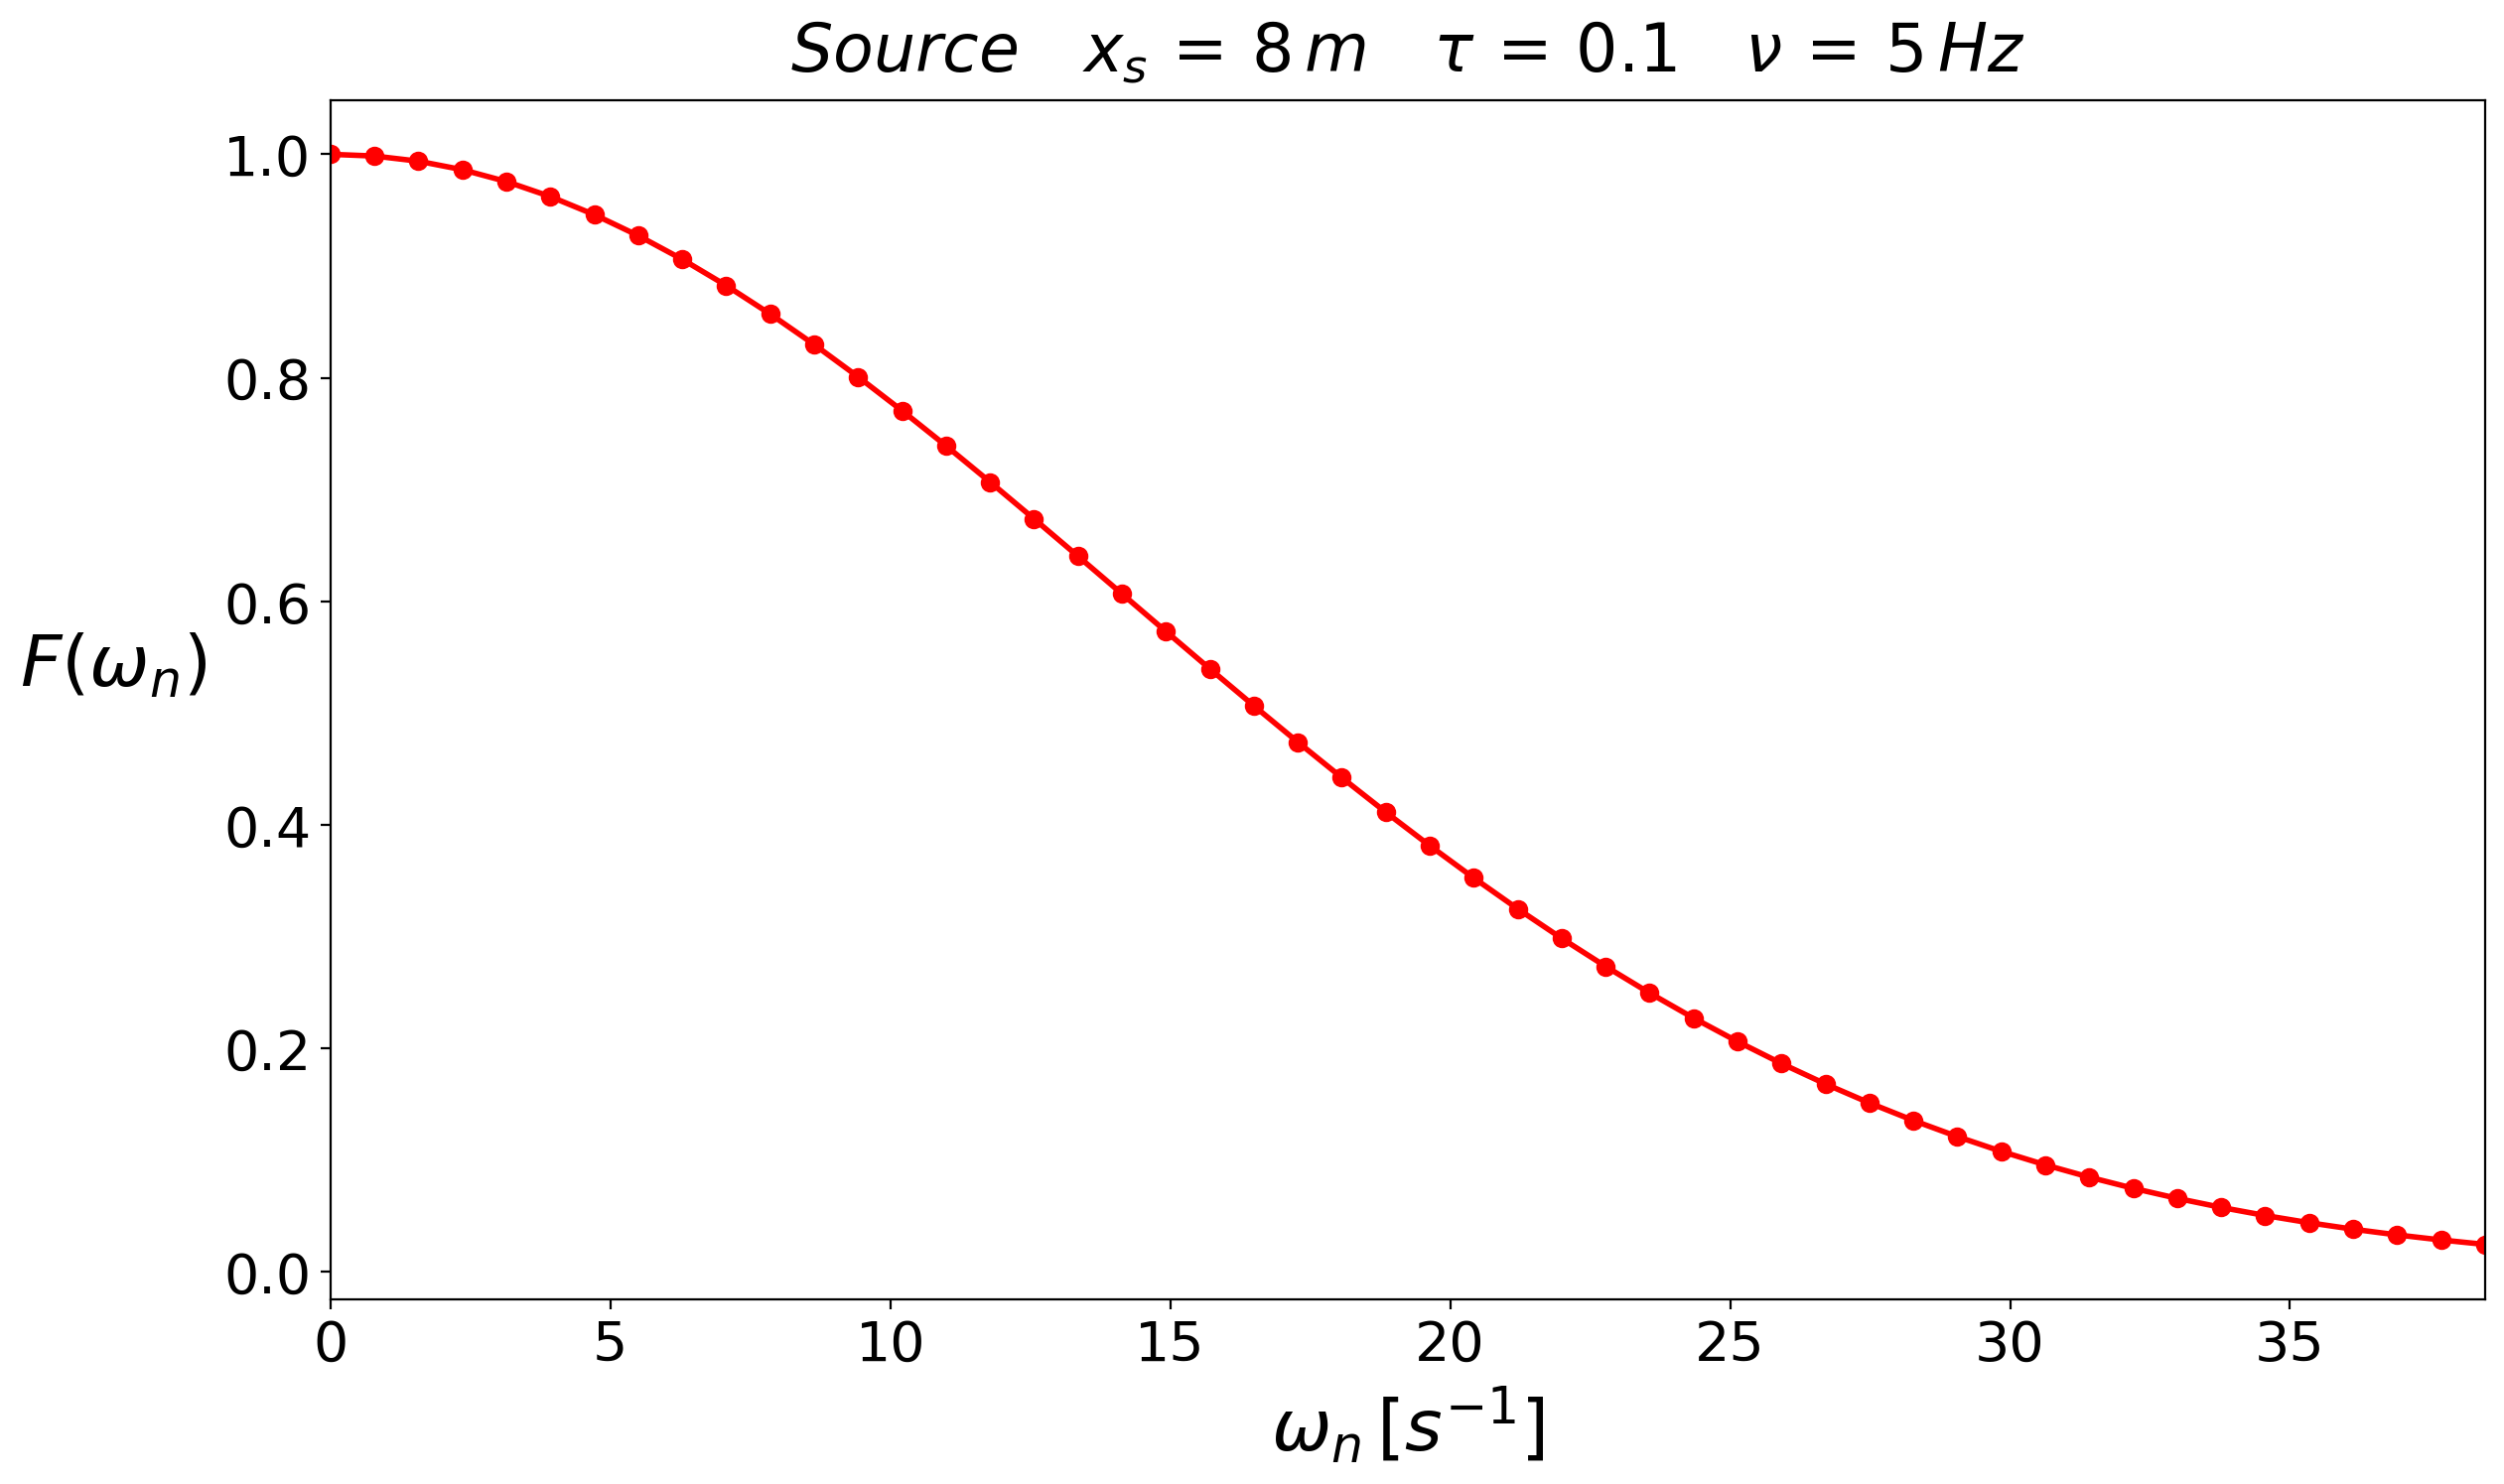

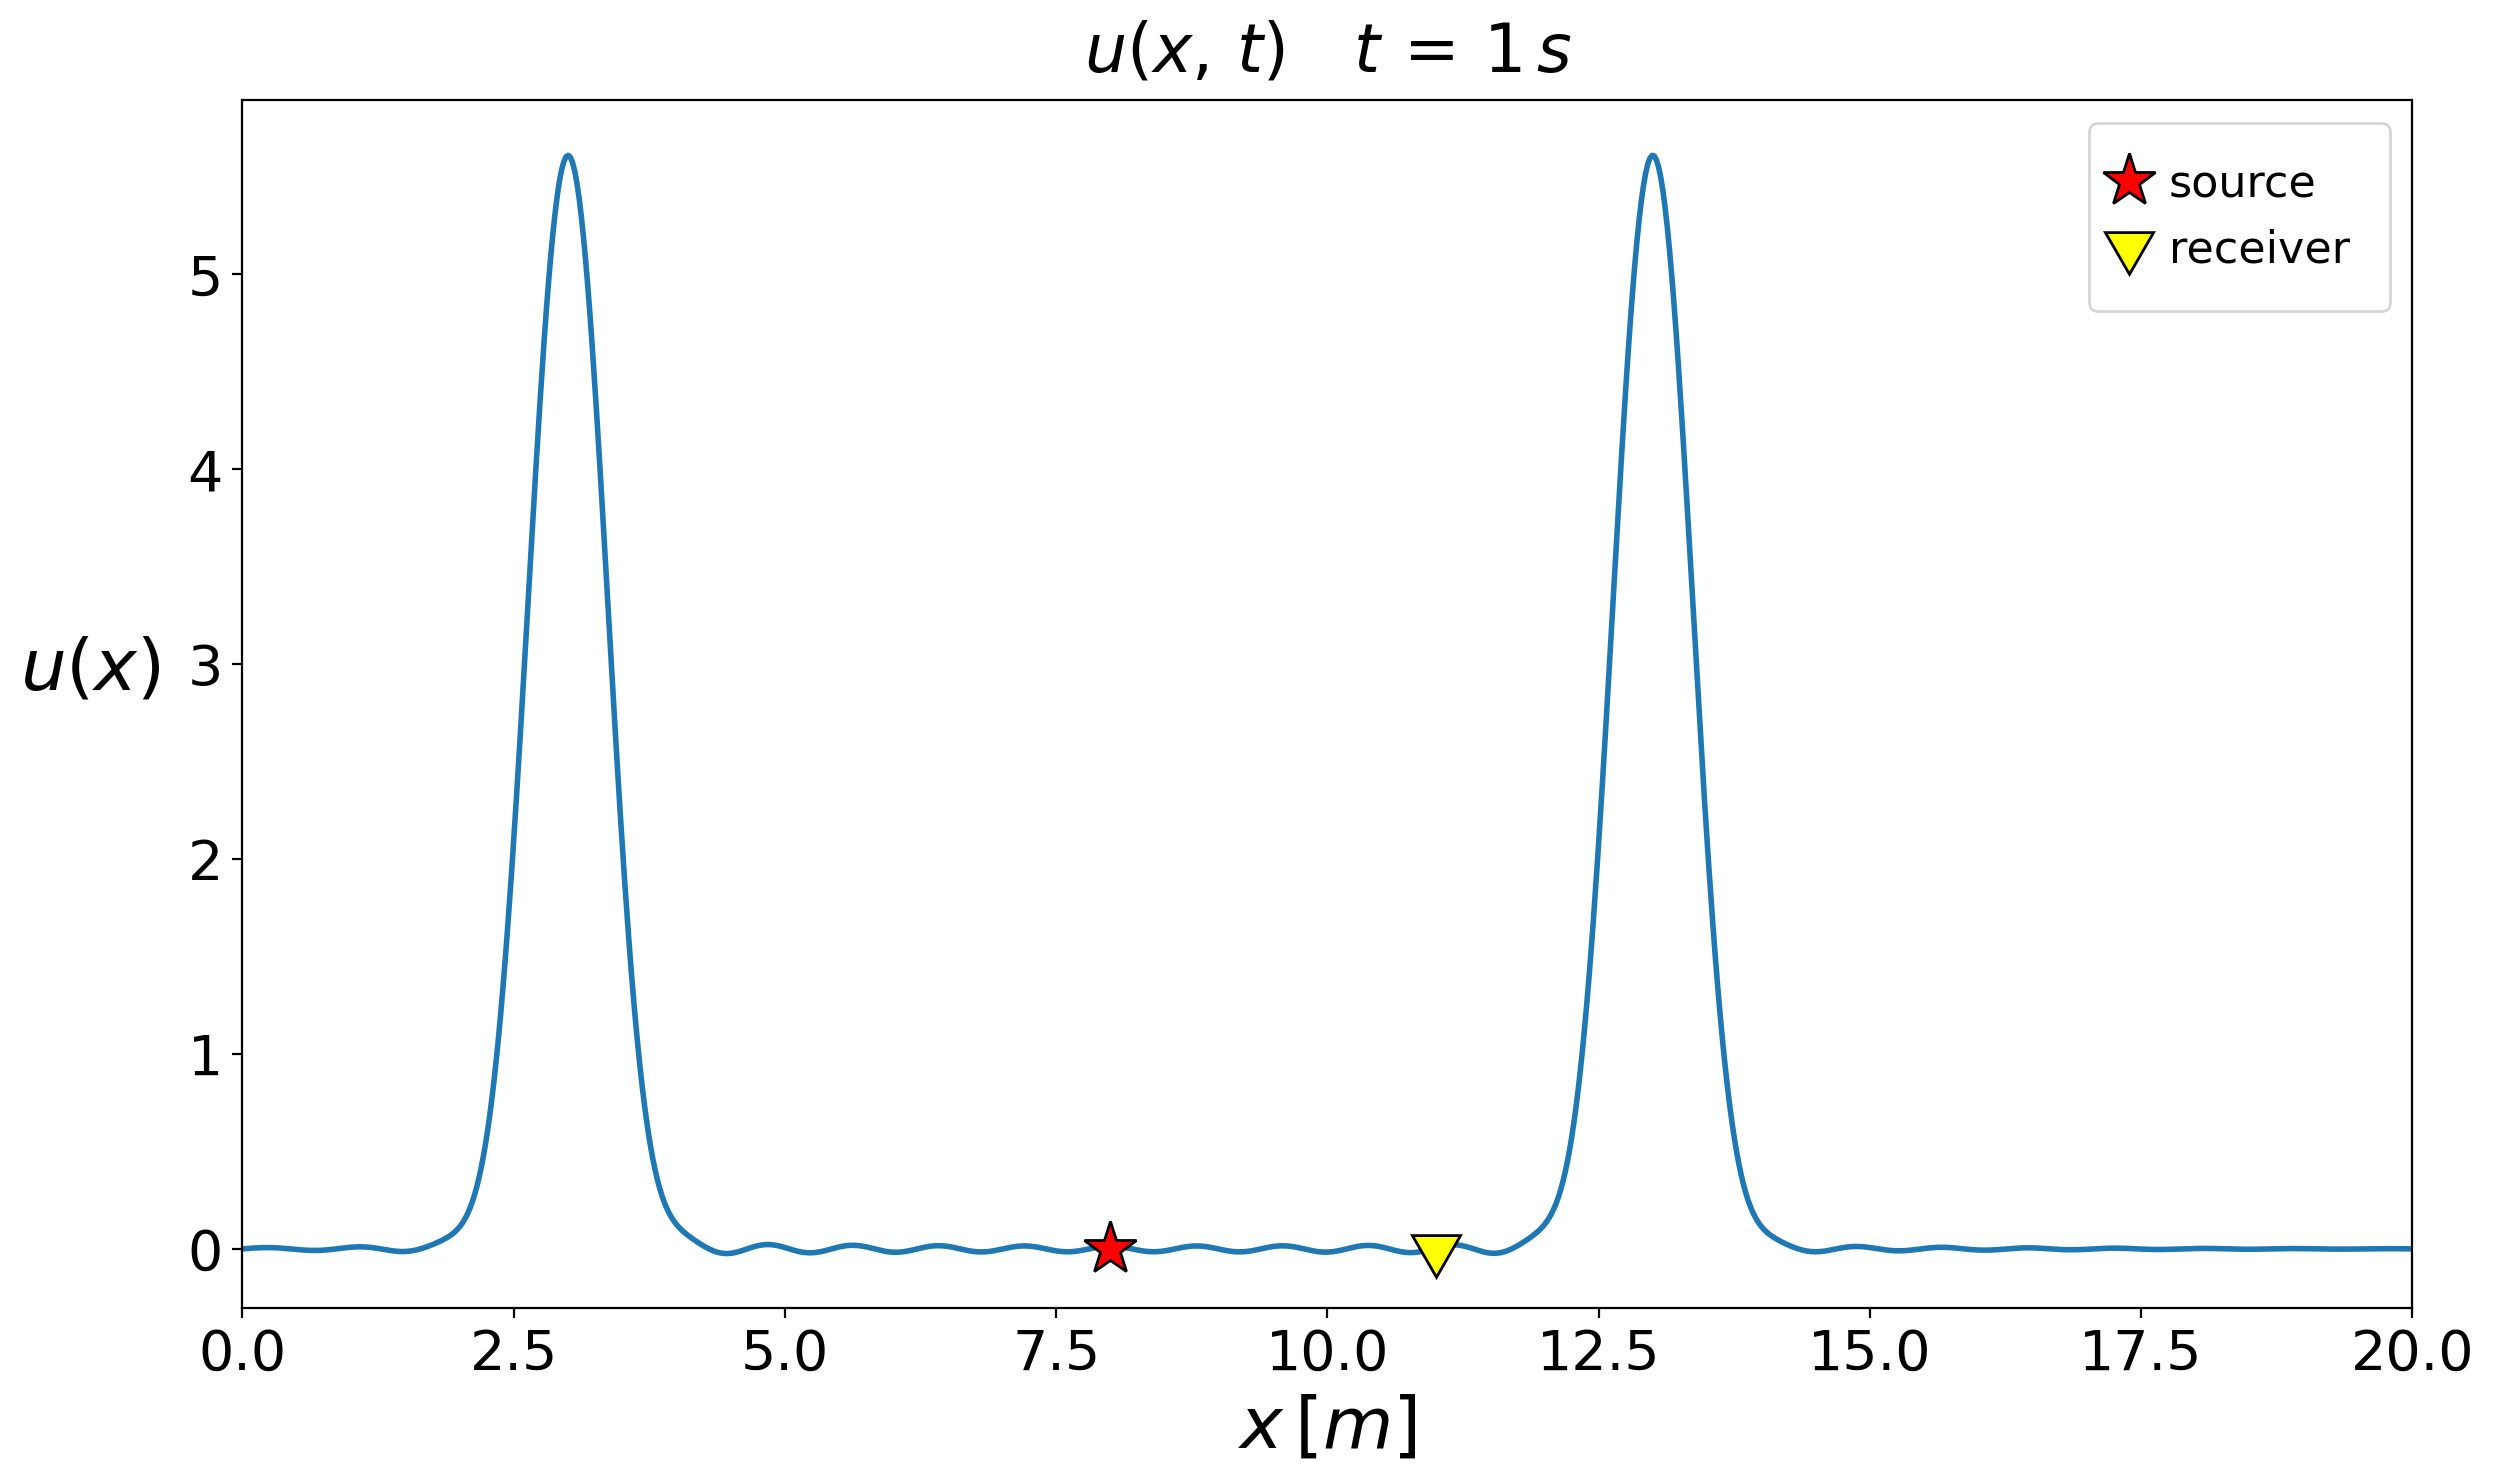

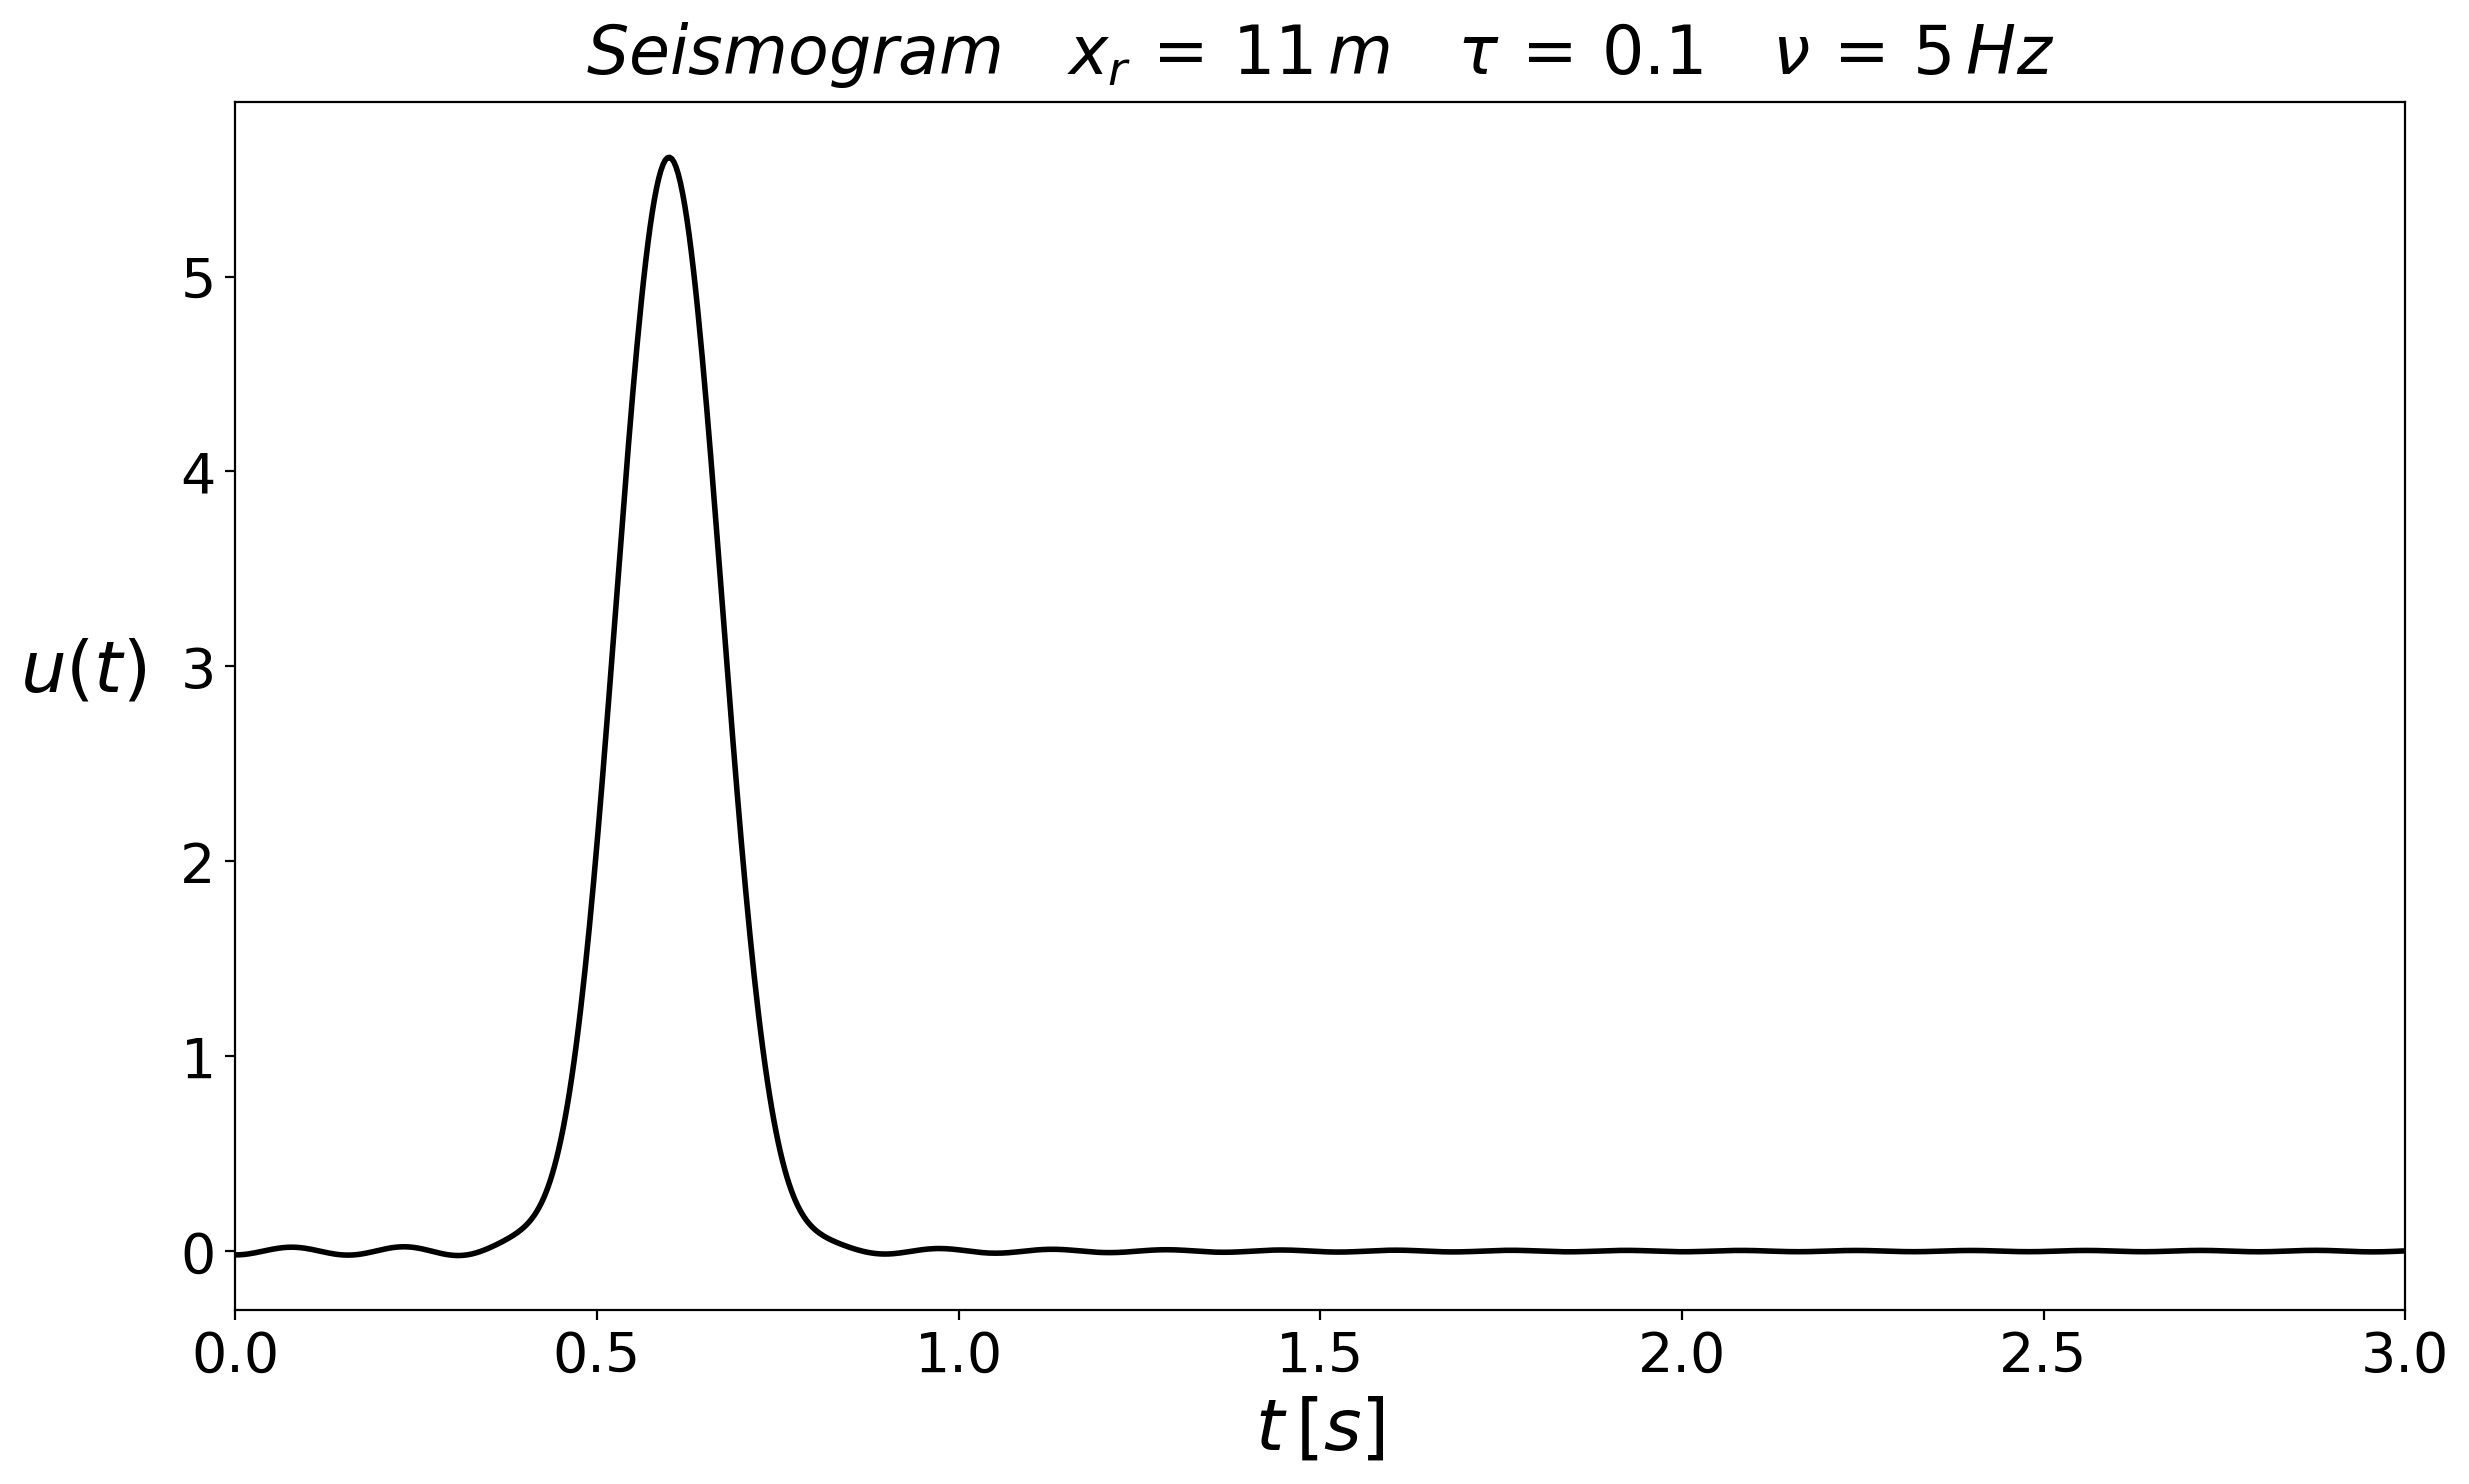

In [ ]:
  w, F = fw (nu, tau, L, N)

  x, ux = u_x (N, nx, c, xs, L, w, F, tr)
  t, ut = u_t (N, nt, c, xs, xr, L, w, F, T)

  fig = plt.figure (figsize = (14, 8), dpi = 200)
  ax = fig.add_subplot (111)

  plt.xlim (0, w[-1])
  plt.plot (w, F, color = 'red', marker = 'o', linewidth = 2)

  plt.xlabel (r'$\omega_n\,[s^{-1}]$',
              fontsize = 26)
  plt.ylabel (r'$F(\omega_n)$',
              fontsize = 26,
              rotation = 0,
              labelpad = 40)
  plt.tick_params (axis = 'x',
                   labelsize = 20)
  plt.tick_params (axis = 'y',
                   labelsize = 20)
  plt.title (fr'$Source\quad x_s\,=\,{xs:g}\,m\quad' \
             fr'\tau\,=\,{tau:g}\quad\nu\,=\,{nu:g}\,Hz$',
             fontsize = 24,
             y = 1.01)

  plt.show ()

  fig = plt.figure (figsize = (14, 8), dpi = 200)
  ax = fig.add_subplot (111)

  plt.xlim (0, L)
  plt.plot (x, ux, linewidth = 2)
  plt.plot (xs, 0,
            marker = '*',
            markersize = 20,
            color = 'red',
            label = 'source',
            markeredgecolor = 'black')
  plt.plot (xr, 0,
            marker = (3, 0, 180),
            markersize = 20,
            color = 'yellow',
            label = 'receiver',
            markeredgecolor = 'black')

  plt.legend (fontsize = 16,
              numpoints = 1,
              handlelength = 0,
              handletextpad = 0.9,
              borderpad = 0.9)
  plt.xlabel (r'$x\,[m]$',
              fontsize = 26)
  plt.ylabel (r'$u(x)$',
              fontsize = 26,
              rotation = 0,
              labelpad = 35)
  plt.tick_params (axis = 'x',
                   labelsize = 20)
  plt.tick_params (axis = 'y',
                   labelsize = 20)
  plt.title (fr'$u(x,\,t)\quad t\,=\,{tr:g}\,s$',
             fontsize = 24,
             y = 1.01)

  plt.show ()

  fig = plt.figure (figsize = (14, 8), dpi = 200)
  ax = fig.add_subplot (111)

  plt.xlim (0, T)
  plt.plot (t, ut, color = 'black', linewidth = 2)

  plt.xlabel (r'$t\,[s]$',
              fontsize = 26)
  plt.ylabel (r'$u(t)$',
              fontsize = 26,
              rotation = 0,
              labelpad = 35)
  plt.tick_params (axis = 'x',
                   labelsize = 20)
  plt.tick_params (axis = 'y',
                   labelsize = 20)
  plt.title (fr'$Seismogram\quad x_r\,=\,{xr:g}\,m\quad' \
             fr'\tau\,=\,{tau:g}\quad\nu\,=\,{nu:g}\,Hz$',
             fontsize = 24,
             y = 1.01)

  plt.show ()